In [1]:
# CUDA: Let's check that Nvidia CUDA drivers are already pre-installed and which version is it.
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [2]:
!ls /usr/bin | grep nvidia
!echo $PATH

nvidia-bug-report.sh
nvidia-cuda-mps-control
nvidia-cuda-mps-server
nvidia-debugdump
nvidia-installer
nvidia-modprobe
nvidia-ngx-updater
nvidia-persistenced
nvidia-powerd
nvidia-settings
nvidia-sleep.sh
nvidia-smi
nvidia-uninstall
nvidia-xconfig
/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin


In [3]:
!nvidia-smi

Mon Dec 16 15:57:06 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P0              46W / 400W |      2MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

Add the dataset

In [ ]:
!pip install --upgrade dataset-tools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 kB 4.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 kB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 103.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.9/140.9 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 114.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 116.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 90.5 MB

In [4]:
!pip install -q transformers==4.20.0
!pip install -q pytorch-lightning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.3/77.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 100.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sentence-transformers 3.2.1 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.20.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.4/926.4 kB 40.7 MB/s eta 0:00:00


In [ ]:
import dataset_tools as dtools
dtools.download(dataset='deepNIR Fruit Detection', dst_dir='/content/dataset-ninja/')

Unpacking 'deepnir-fruit-detection.tar': 100%|██████████| 8593/8593 [00:06<00:00, 1379.45file/s]


'/content/dataset-ninja/deepnir-fruit-detection'

Check the structure of this dataset

In [ ]:
!ls /content/dataset-ninja/deepnir-fruit-detection

LICENSE.md  meta.json  README.md  test	train  valid


In [ ]:
import os
import json
import shutil
from sklearn.model_selection import train_test_split

# Define paths
train_path = "/content/dataset-ninja/deepnir-fruit-detection/train"
val_path = "/content/dataset-ninja/deepnir-fruit-detection/valid"
test_path = "/content/dataset-ninja/deepnir-fruit-detection/test"

# List the contents of the img and ann directories
train_img_files = os.listdir(os.path.join(train_path, "img"))
train_ann_files = os.listdir(os.path.join(train_path, "ann"))
val_img_files = os.listdir(os.path.join(val_path, "img"))
val_ann_files = os.listdir(os.path.join(val_path, "ann"))
test_img_files = os.listdir(os.path.join(test_path, "img"))
test_ann_files = os.listdir(os.path.join(test_path, "ann"))

print("Number of train images:", len(train_img_files))
print("Number of train annotations:", len(train_ann_files))
print("Number of val images:", len(val_img_files))
print("Number of val annotations:", len(val_ann_files))
print("Number of test images:", len(test_img_files))
print("Number of test annotations:", len(test_ann_files))

# Create directories if not exist
os.makedirs(os.path.join(train_path, "img"), exist_ok=True)
os.makedirs(os.path.join(train_path, "ann"), exist_ok=True)
os.makedirs(os.path.join(val_path, "img"), exist_ok=True)
os.makedirs(os.path.join(val_path, "ann"), exist_ok=True)
os.makedirs(os.path.join(test_path, "img"), exist_ok=True)
os.makedirs(os.path.join(test_path, "ann"), exist_ok=True)

Number of train images: 3434
Number of train annotations: 3434
Number of val images: 430
Number of val annotations: 430
Number of test images: 431
Number of test annotations: 431


In [ ]:
# discover the "img" and "ann"
# Print the first five files in each directory
print("First five files in 'img':", train_img_files[:5])
print("First five files in 'ann':", train_ann_files[:5])

First five files in 'img': ['8e2f178d1_jpg.rf.c895c71d3d19627cbd775171f2fc140e.jpg', '2a4b71fcc_jpg.rf.b80f12f37157e006e380e15dcadd50ab.jpg', 'AdobeStock_245055997__1_-0_jpg.rf.7a49c83b21a867ed21f9256ed8ca2142.jpg', '695ae4a12_jpg.rf.5efa9a0b065f9309c67f26bdbad3efd1.jpg', 'c00e6b4c5_jpg.rf.20eb6137674536c14dcae6b490acaeae.jpg']
First five files in 'ann': ['bfaa92629_jpg.rf.1cf9a50d6452904314ba8702ee5c28a3.jpg.json', '43d29ec95_jpg.rf.10fc5bf6751e9d85bd6b4a528bc88d43.jpg.json', '03a988adf_jpg.rf.12ad47cf3c3d9c75d8239b70befd03c7.jpg.json', '1856c545d_jpg.rf.f9f387ad38ed354c8cbb98ce36a55424.jpg.json', '3c14db5cc_jpg.rf.c092ca591190ee49eac4f238259ad7b2.jpg.json']


We found that it's not sorted, so we need to pair them up manually: ann name(.jpg) = file name.jpg(.json)

Also filter to have only bounding boxes for the wheat class

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

def filter_bounding_boxes(img_dir, ann_dir, visualize=False):
    """
    Filters images and annotations to include only those with bounding boxes
    for the specified class.

    Args:
        img_dir (str): Directory containing image files.
        ann_dir (str): Directory containing annotation files.
        visualize (bool): If True, displays bounding boxes on the image.

    Returns:
        list: Filtered image file paths.
        list: Filtered annotation file paths.
    """
    filtered_imgs = []
    filtered_anns = []

    for img_file in sorted(os.listdir(img_dir)):
        img_path = os.path.join(img_dir, img_file)
        ann_file = img_file + ".json"  # Match image file
        ann_path = os.path.join(ann_dir, ann_file)

        with open(ann_path, 'r') as f:
            annotation = json.load(f)

        # Check if the annotation contains at least one bounding box for the class
        contains_class = any(
            obj["classTitle"] == "wheat" and obj["geometryType"] == "rectangle"
            for obj in annotation.get("objects", [])
        )

        if contains_class:
            filtered_imgs.append(img_path)
            filtered_anns.append(ann_path)

            # Visualization (if enabled)
            if visualize:
                print(f"Visualizing: {img_path}")
                bounding_boxes = [
                    obj["points"]["exterior"]
                    for obj in annotation["objects"]
                    if obj["classTitle"] == "wheat" and obj["geometryType"] == "rectangle"
                ]

                # Open and display the image with bounding boxes
                img = Image.open(img_path).convert("RGB")
                fig, ax = plt.subplots(1, 1, figsize=(10, 10))
                ax.imshow(img)

                # Add bounding boxes
                for bbox in bounding_boxes:
                    x_min, y_min = bbox[0]
                    x_max, y_max = bbox[1]
                    width = x_max - x_min
                    height = y_max - y_min
                    rect = patches.Rectangle((x_min, y_min), width, height, linewidth=2, edgecolor='red', facecolor='none')
                    ax.add_patch(rect)

                ax.set_title(f"Bounding Boxes for {img_path}")
                plt.axis('off')
                plt.show()

            # Extract detected object
            detected_objects = [obj["classTitle"] for obj in annotation.get("objects", [])]
            # print(f"Object Class is: {detected_objects[0]}")

            # Count the number of detected objects
            num_objects = len(detected_objects)
            print(f"{img_file}: Object Class is {detected_objects[0]}; Num detected: {num_objects}")

    print(f"Filtered {len(filtered_imgs)} images and annotations.")

    return filtered_imgs, filtered_anns

In [ ]:
train_imgs, train_anns = filter_bounding_boxes(os.path.join(train_path, "img"), os.path.join(train_path, "ann"))
val_imgs, val_anns = filter_bounding_boxes(os.path.join(val_path, "img"), os.path.join(val_path, "ann"))
test_imgs, test_anns = filter_bounding_boxes(os.path.join(test_path, "img"), os.path.join(test_path, "ann"))

00333207f_jpg.rf.0f14c64c1172144c0c6940b55ff42d9c.jpg: Object Class is wheat; Num detected: 55
005b0d8bb_jpg.rf.f49004dbfd800cd7ef4baea199a3a060.jpg: Object Class is wheat; Num detected: 20
00b5fefed_jpg.rf.e0000563d76086104f6da9f777bf3b61.jpg: Object Class is wheat; Num detected: 25
00b70a919_jpg.rf.7b63ac89f96f3fb22287cdb8943753e0.jpg: Object Class is wheat; Num detected: 7
00e903abe_jpg.rf.7c67a46a670d6be82aa8c01f54b36764.jpg: Object Class is wheat; Num detected: 43
00ea5e5ee_jpg.rf.08ced040988457f23f7e1b4a7f52261a.jpg: Object Class is wheat; Num detected: 55
010b216d4_jpg.rf.bb2232affd576643f36c7c480d3e2a12.jpg: Object Class is wheat; Num detected: 36
010c93b99_jpg.rf.464fb93f32b8e779d7da733399ce0e1a.jpg: Object Class is wheat; Num detected: 16
010dbcc8f_jpg.rf.b5aacd2b04982143b55827a1cb728d65.jpg: Object Class is wheat; Num detected: 49
0114c88aa_jpg.rf.9eb5fde924107672969a98440cbfebdb.jpg: Object Class is wheat; Num detected: 21
01189a3c3_jpg.rf.9dbeb4409af966bf66690bf7268534c6.j

In [ ]:
def save_filtered_data(img_paths, ann_paths, img_dest, ann_dest):
    """
    Saves filtered images and annotations into specified directories.

    Args:
        img_paths (list): List of image file paths.
        ann_paths (list): List of annotation file paths.
        img_dest (str): Destination directory for images.
        ann_dest (str): Destination directory for annotations.
    """
    os.makedirs(img_dest, exist_ok=True)
    os.makedirs(ann_dest, exist_ok=True)

    for img_path, ann_path in zip(img_paths, ann_paths):
        shutil.copy(img_path, img_dest)
        shutil.copy(ann_path, ann_dest)

# Paths for saving filtered data
filtered_train_path = "/content/dataset-ninja/wheat/train"
filtered_val_path = "/content/dataset-ninja/wheat/val"
filtered_test_path = "/content/dataset-ninja/wheat/test"

# Save filtered datasets
save_filtered_data(train_imgs, train_anns, os.path.join(filtered_train_path, "img"), os.path.join(filtered_train_path, "ann"))
save_filtered_data(val_imgs, val_anns, os.path.join(filtered_val_path, "img"), os.path.join(filtered_val_path, "ann"))
save_filtered_data(test_imgs, test_anns, os.path.join(filtered_test_path, "img"), os.path.join(filtered_test_path, "ann"))

# Final counts
print(f"Filtered Training set: {len(train_imgs)} images, {len(train_anns)} annotations")
print(f"Filtered Validation set: {len(val_imgs)} images, {len(val_anns)} annotations")
print(f"Filtered Test set: {len(test_imgs)} images, {len(test_anns)} annotations")

Filtered Training set: 2699 images, 2699 annotations
Filtered Validation set: 337 images, 337 annotations
Filtered Test set: 337 images, 337 annotations


## Convert data to COCO format

In [ ]:
import os
import json
from PIL import Image

def convert_to_coco_format(images_dir, annotations_dir, output_file):
  coco_format = {
      "images": [],
      "annotations": [],
      "categories": []
  }

  # Define categories (modify as per your dataset)
  categories = [
    {"id": 0, "name": "wheat"},
  ]

  # Add categories to COCO format
  coco_format["categories"] = categories

  annotation_id = 0

  # Process each annotation file
  for ann_file in os.listdir(annotations_dir):
    if ann_file.endswith(".json"):
        ann_path = os.path.join(annotations_dir, ann_file)
        image_name = os.path.splitext(ann_file)[0]
        image_path = os.path.join(images_dir, image_name)

        # Skip if the image does not exist
        if not os.path.exists(image_path):
            continue

        # Get image dimensions
        with Image.open(image_path) as img:
          width, height = img.size

        # Add image entry
        image_id = len(coco_format["images"]) + 1
        coco_format["images"].append({
            "id": image_id,
            "file_name": image_name,
            "width": width,
            "height": height
        })

        # Load annotation file
        with open(ann_path, "r") as f:
            annotations = json.load(f)

        # Add annotations to COCO format
        for obj in annotations.get("objects", []):
            x_min, y_min = obj["points"]["exterior"][0]
            x_max, y_max = obj["points"]["exterior"][1]
            box_width = (x_max - x_min)
            box_height = (y_max - y_min)
            bbox = [x_min, y_min, box_width, box_height]

            class_id = obj["classId"]

            # COCO format: [x, y, width, height]
            coco_format["annotations"].append({
                "id": annotation_id,
                "image_id": image_id,
                "category_id": 0,
                "bbox": bbox,
                "area": box_width * box_height,
                "iscrowd": 0
            })

            annotation_id += 1

  # Save the COCO annotations to a JSON file
  with open(output_file, "w") as f:
    json.dump(coco_format, f, indent=4)

  print(f"COCO annotations saved to {output_file}")

In [ ]:
coco_train_output = os.path.join(filtered_train_path, "coco_annotations_train.json")
coco_test_output = os.path.join(filtered_test_path, "coco_annotations_test.json")
coco_val_output = os.path.join(filtered_val_path, "coco_annotations_val.json")

convert_to_coco_format(
    images_dir=os.path.join(filtered_train_path, "img"),
    annotations_dir=os.path.join(filtered_train_path, "ann"),
    output_file=coco_train_output
)

convert_to_coco_format(
    images_dir=os.path.join(filtered_test_path, "img"),
    annotations_dir=os.path.join(filtered_test_path, "ann"),
    output_file=coco_test_output
)

convert_to_coco_format(
    images_dir=os.path.join(filtered_val_path, "img"),
    annotations_dir=os.path.join(filtered_val_path, "ann"),
    output_file=coco_val_output
)

COCO annotations saved to /content/dataset-ninja/wheat/train/coco_annotations_train.json
COCO annotations saved to /content/dataset-ninja/wheat/test/coco_annotations_test.json
COCO annotations saved to /content/dataset-ninja/wheat/val/coco_annotations_val.json


In [ ]:
! mkdir data
! mkdir data/images
! mkdir data/annotations

! mv /content/dataset-ninja/wheat/train/img data/images/train
! mv /content/dataset-ninja/wheat/test/img data/images/test
! mv /content/dataset-ninja/wheat/val/img data/images/val

! cp /content/dataset-ninja/wheat/train/coco_annotations_train.json data/annotations/
! cp /content/dataset-ninja/wheat/test/coco_annotations_test.json data/annotations/
! cp /content/dataset-ninja/wheat/val/coco_annotations_val.json data/annotations/

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!zip -r data.zip data
!cp data.zip /content/drive/MyDrive/data.zip

  adding: data/ (stored 0%)
  adding: data/annotations/ (stored 0%)
  adding: data/annotations/coco_annotations_train.json (deflated 93%)
  adding: data/annotations/coco_annotations_val.json (deflated 93%)
  adding: data/annotations/coco_annotations_test.json (deflated 93%)
  adding: data/images/ (stored 0%)
  adding: data/images/train/ (stored 0%)
  adding: data/images/train/8e2f178d1_jpg.rf.c895c71d3d19627cbd775171f2fc140e.jpg (deflated 0%)
  adding: data/images/train/2a4b71fcc_jpg.rf.b80f12f37157e006e380e15dcadd50ab.jpg (deflated 0%)
  adding: data/images/train/695ae4a12_jpg.rf.5efa9a0b065f9309c67f26bdbad3efd1.jpg (deflated 0%)
  adding: data/images/train/c00e6b4c5_jpg.rf.20eb6137674536c14dcae6b490acaeae.jpg (deflated 0%)
  adding: data/images/train/79d5a9b6b_jpg.rf.650a6d1a9b64a180cf4063b56cab6664.jpg (deflated 0%)
  adding: data/images/train/029e03e52_jpg.rf.2bf78e075f53f4741aa2b21748e136ef.jpg (deflated 0%)
  adding: data/images/train/98db75bde_jpg.rf.9c74f92ac73b6f1312b6e4815835

In [6]:
!cp /content/drive/MyDrive/data.zip ./
!unzip data.zip

Archive:  data.zip
   creating: data/
   creating: data/annotations/
  inflating: data/annotations/coco_annotations_train.json  
  inflating: data/annotations/coco_annotations_val.json  
  inflating: data/annotations/coco_annotations_test.json  
   creating: data/images/
   creating: data/images/train/
  inflating: data/images/train/8e2f178d1_jpg.rf.c895c71d3d19627cbd775171f2fc140e.jpg  
  inflating: data/images/train/2a4b71fcc_jpg.rf.b80f12f37157e006e380e15dcadd50ab.jpg  
  inflating: data/images/train/695ae4a12_jpg.rf.5efa9a0b065f9309c67f26bdbad3efd1.jpg  
  inflating: data/images/train/c00e6b4c5_jpg.rf.20eb6137674536c14dcae6b490acaeae.jpg  
  inflating: data/images/train/79d5a9b6b_jpg.rf.650a6d1a9b64a180cf4063b56cab6664.jpg  
  inflating: data/images/train/029e03e52_jpg.rf.2bf78e075f53f4741aa2b21748e136ef.jpg  
  inflating: data/images/train/98db75bde_jpg.rf.9c74f92ac73b6f1312b6e48158350365.jpg  
  inflating: data/images/train/2643476a0_jpg.rf.82b21f498299eb53c913780b078ea539.jpg  


## Load Dataset

In [7]:
#Register dataset as torchvision CocoDetection
import torchvision
import os

class CocoDetection(torchvision.datasets.CocoDetection):
    def __init__(self, img_folder, ann_file, feature_extractor, train=True):
        super(CocoDetection, self).__init__(img_folder, ann_file)
        self.feature_extractor = feature_extractor

    def __getitem__(self, idx):
        # read in PIL image and target in COCO format
        img, target = super(CocoDetection, self).__getitem__(idx)

        # preprocess image and target (converting target to DETR format, resizing + normalization of both image and target)
        image_id = self.ids[idx]
        target = {'image_id': image_id, 'annotations': target}
        encoding = self.feature_extractor(images=img, annotations=target, return_tensors="pt")
        pixel_values = encoding["pixel_values"].squeeze() # remove batch dimension
        target = encoding["labels"][0] # remove batch dimension

        return pixel_values, target

In [8]:
from transformers import AutoFeatureExtractor

image_path = "/content/data/images"
ann_path = "/content/data/annotations"

feature_extractor = AutoFeatureExtractor.from_pretrained("hustvl/yolos-small", size=512, max_size=864)

train_dataset = CocoDetection(img_folder=(image_path+"/train"), ann_file=(ann_path+"/coco_annotations_train.json"), feature_extractor=feature_extractor)
val_dataset = CocoDetection(img_folder=(image_path+"/val"), ann_file=(ann_path+"/coco_annotations_val.json"), feature_extractor=feature_extractor)
test_dataset = CocoDetection(img_folder=(image_path+"/test"), ann_file=(ann_path+"/coco_annotations_test.json"), feature_extractor=feature_extractor)

print("Number of training examples:", len(train_dataset))
print("Number of validation examples:", len(val_dataset))
print("Number of test examples:", len(test_dataset))

Downloading:   0%|          | 0.00/292 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.04k [00:00<?, ?B/s]

loading annotations into memory...
Done (t=0.62s)
creating index...
index created!
loading annotations into memory...
Done (t=0.27s)
creating index...
index created!
loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
Number of training examples: 2699
Number of validation examples: 337
Number of test examples: 337


Image n°1576
1576 /content/data/images/train/77222a135_jpg.rf.678ab15f393feaab5459ec737fd7562b.jpg


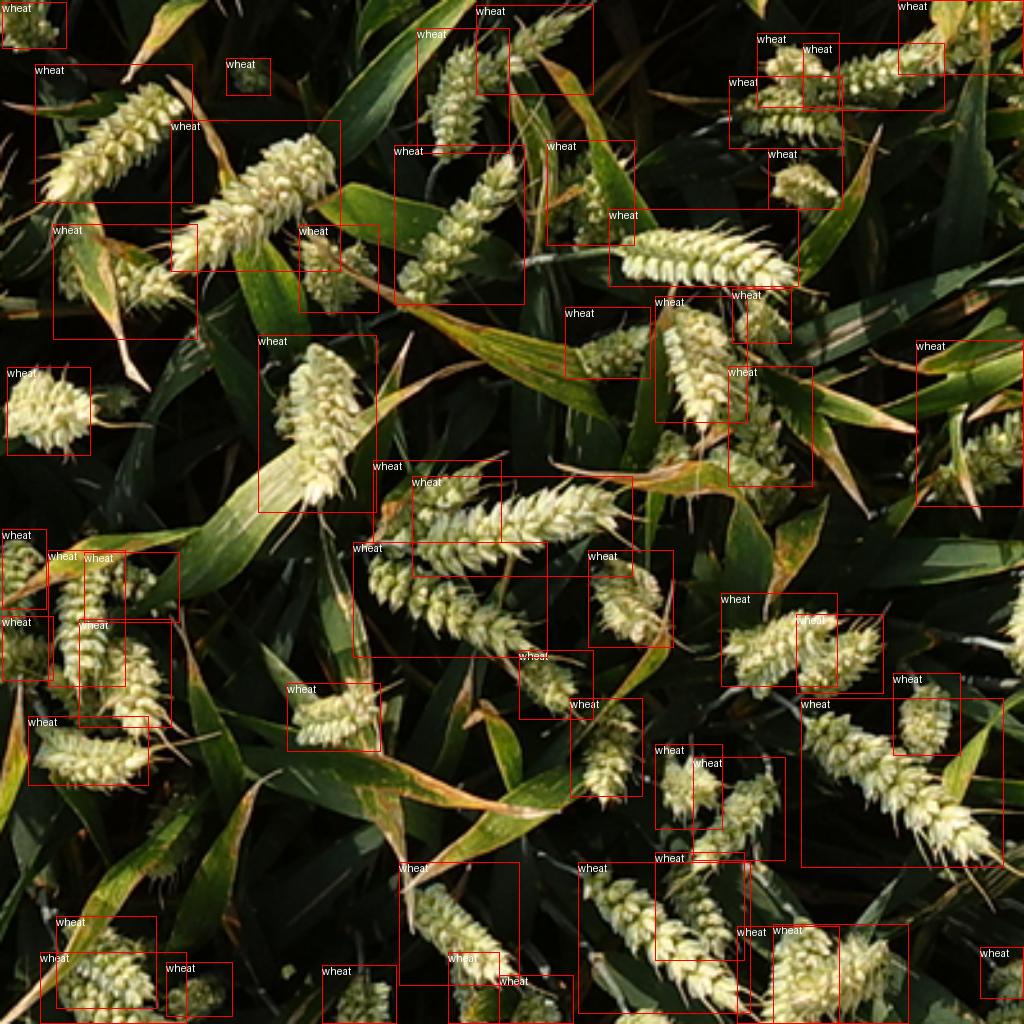

In [12]:
#Vizualize that our data has loaded correctly - You can hit this cell as many times as you want to vizualize how your training set has loaded
import numpy as np
import os
from PIL import Image, ImageDraw

# based on https://github.com/woctezuma/finetune-detr/blob/master/finetune_detr.ipynb
image_ids = train_dataset.coco.getImgIds()
# let's pick a random image
image_id = image_ids[np.random.randint(0, len(image_ids))]
print('Image n°{}'.format(image_id))
imageInfo = train_dataset.coco.loadImgs(image_id)[0]
image = Image.open(os.path.join(image_path + '/train', imageInfo['file_name']))

print(image_id, os.path.join(image_path + '/train', imageInfo['file_name']))

annotations = train_dataset.coco.imgToAnns[image_id]
draw = ImageDraw.Draw(image, "RGBA")

cats = train_dataset.coco.cats
id2label = {k: v['name'] for k,v in cats.items()}

for annotation in annotations:
  box = annotation['bbox']
  class_idx = annotation['category_id']
  x,y,w,h = tuple(box)
  draw.rectangle((x,y,x+w,y+h), outline='red', width=1)
  draw.text((x, y), id2label[class_idx], fill='white')

image

# Train YOLO

In [14]:
#Setup dataloader for training loop

from torch.utils.data import DataLoader

def collate_fn(batch):
  pixel_values = [item[0] for item in batch]
  encoding = feature_extractor.pad(pixel_values, return_tensors="pt")
  labels = [item[1] for item in batch]
  batch = {}
  batch['pixel_values'] = encoding['pixel_values']
  batch['labels'] = labels
  return batch

train_dataloader = DataLoader(train_dataset, collate_fn=collate_fn, batch_size=4, shuffle=True, num_workers=7)
val_dataloader = DataLoader(val_dataset, collate_fn=collate_fn, batch_size=4, num_workers=7)
batch = next(iter(train_dataloader))

In [15]:
# For our training configuration, we will start from the pretrained YOLOS-base model from
# Hugging Face transformers

import pytorch_lightning as pl
from transformers import DetrConfig, AutoModelForObjectDetection
import torch
from torch.optim.lr_scheduler import CosineAnnealingLR

#we wrap our model around pytorch lightning for training
class YoloS(pl.LightningModule):

     def __init__(self, lr, weight_decay):
         super().__init__()
         # replace COCO classification head with custom head
         self.model = AutoModelForObjectDetection.from_pretrained("hustvl/yolos-base",
                                                             num_labels=len(id2label),
                                                             ignore_mismatched_sizes=True)
         # see https://github.com/PyTorchLightning/pytorch-lightning/pull/1896
         self.lr = lr
         self.weight_decay = weight_decay
         self.save_hyperparameters()  # adding this will save the hyperparameters to W&B too

     def forward(self, pixel_values):
       outputs = self.model(pixel_values=pixel_values)

       return outputs

     def common_step(self, batch, batch_idx):
       pixel_values = batch["pixel_values"]
       labels = [{k: v.to(self.device) for k, v in t.items()} for t in batch["labels"]]

       outputs = self.model(pixel_values=pixel_values, labels=labels)

       loss = outputs.loss
       loss_dict = outputs.loss_dict

       return loss, loss_dict

     def training_step(self, batch, batch_idx):
        loss, loss_dict = self.common_step(batch, batch_idx)
        # logs metrics for each training_step,
        # and the average across the epoch
        self.log("train/loss", loss)  # logging metrics with a forward slash will ensure the train and validation metrics as split into 2 separate sections in the W&B workspace
        for k,v in loss_dict.items():
          self.log("train/" + k, v.item())  # logging metrics with a forward slash will ensure the train and validation metrics as split into 2 separate sections in the W&B workspace

        return loss

     def validation_step(self, batch, batch_idx):
        loss, loss_dict = self.common_step(batch, batch_idx)
        self.log("validation/loss", loss) # logging metrics with a forward slash will ensure the train and validation metrics as split into 2 separate sections in the W&B workspace
        for k,v in loss_dict.items():
          self.log("validation/" + k, v.item()) #  logging metrics with a forward slash will ensure the train and validation metrics as split into 2 separate sections in the W&B workspace

        return loss

     def configure_optimizers(self):
        optimizer = torch.optim.AdamW(self.parameters(), lr=self.lr,
                                  weight_decay=self.weight_decay)
        # return optimizer

        # Define scheduler
        scheduler = CosineAnnealingLR(optimizer, T_max=10)
        return [optimizer], [scheduler]


     def train_dataloader(self):
        return train_dataloader

     def val_dataloader(self):
        return val_dataloader

In [16]:
#initialize the model
from pytorch_lightning import Trainer

# # Path to the checkpoint file
# checkpoint_path = "drive/MyDrive/logs/epoch20/version_0/checkpoints/epoch=19-step=1700.ckpt"

# # Load the model from the checkpoint
# model = YoloS.load_from_checkpoint(checkpoint_path)

model = YoloS(lr=2.5e-5, weight_decay=1e-4)

Downloading:   0%|          | 0.00/4.04k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/488M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:461: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(checkpoint_file, map_location="cp

In [24]:
from pytorch_lightning import Trainer
from pytorch_lightning.loggers import CSVLogger
from pytorch_lightning.callbacks import EarlyStopping, ModelCheckpoint

# Define callbacks
early_stopping = EarlyStopping(
    monitor="validation/loss", patience=6, mode="min"
)

checkpoint_callback = ModelCheckpoint(
    dirpath="drive/MyDrive/checkpoints/",
    filename="best_model",
    save_top_k=1,
    monitor="validation/loss",
    mode="min"
)

# csv_logger = CSVLogger("logs/", name="my_model")
csv_logger = CSVLogger("/content/drive/MyDrive/logs/", name="epoch40-changed")

# more epochs leads to a tighter fit of the model to the data
trainer = Trainer(
    max_epochs=100,
    gradient_clip_val=0.1,
    accumulate_grad_batches=8,
    log_every_n_steps=5,
    logger=csv_logger,
    callbacks=[early_stopping, checkpoint_callback]
    )

trainer.fit(model)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                    | Params | Mode
---------------------------------------------------------
0 | model | YolosForObjectDetection | 127 M  | eval
---------------------------------------------------------
127 M     Trainable params
0         Non-trainable params
127 M     Total params
510.917   Total estimated model params size (MB)
0         Modules in train mode
226       Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

In [25]:
# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Generate predictions on the test dataset
test_predictions = []
model.eval()  # Set model to evaluation mode
with torch.no_grad():
    for idx in range(len(test_dataset)):
        pixel_values, target = test_dataset[idx]
        pixel_values = pixel_values.unsqueeze(0).to(device)  # Use the defined device
        outputs = model(pixel_values=pixel_values)
        test_predictions.append(outputs)

In [26]:
import torch

# Convert bounding boxes from (center_x, center_y, width, height) to (x_min, y_min, x_max, y_max)
def box_cxcywh_to_xyxy(box):
    x_c, y_c, w, h = box.unbind(-1)
    b = [(x_c - 0.5 * w), (y_c - 0.5 * h), (x_c + 0.5 * w), (y_c + 0.5 * h)]
    return torch.stack(b, dim=-1)

# Rescale bounding boxes from normalized format to pixel format
def rescale_bboxes(boxes, image_size):
    img_w, img_h = image_size
    boxes = box_cxcywh_to_xyxy(boxes)  # Convert to (x_min, y_min, x_max, y_max) format
    scaling_tensor = torch.tensor([img_w, img_h, img_w, img_h], dtype=torch.float32, device=boxes.device)
    boxes = boxes * scaling_tensor
    return boxes

In [27]:
# Converts model predictions to COCO-style annotations for evaluation
def convert_predictions_to_coco(predictions, image_id, image_size, confidence_threshold=0.5):
    logits = predictions.logits[0]
    probabilities = logits.softmax(dim=-1)
    pred_boxes = predictions.pred_boxes[0]

    # Filter by confidence threshold
    keep = probabilities.max(-1).values > confidence_threshold
    filtered_boxes = pred_boxes[keep]
    filtered_probs = probabilities[keep]

    # Convert to COCO format
    rescaled_boxes = rescale_bboxes(filtered_boxes, image_size)  # Rescale to pixel coordinates
    coco_predictions = []
    for box, prob in zip(rescaled_boxes, filtered_probs):
        class_id = prob.argmax().item()
        confidence = prob[class_id].item()
        coco_predictions.append({
            "image_id": image_id,
            "category_id": class_id,
            "bbox": [box[0].item(), box[1].item(), box[2].item() - box[0].item(), box[3].item() - box[1].item()],
            "score": confidence
        })
    return coco_predictions

In [28]:
import json

with open('/content/data/annotations/coco_annotations_test.json', 'r') as f:
    ground_truth = json.load(f)

# Map by image_id
ground_truth_by_image = {}
for ann in ground_truth['annotations']:
    ground_truth_by_image.setdefault(ann['image_id'], []).append(ann)

# Prepare predictions for all images
predictions = []
for idx, outputs in enumerate(test_predictions):
    image_id = test_dataset.coco.getImgIds()[idx]
    image_info = test_dataset.coco.loadImgs(image_id)[0]
    image_size = (image_info['width'], image_info['height'])
    predictions += convert_predictions_to_coco(outputs, image_id, image_size)

In [29]:
!pip install pycocotools

In [34]:
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval

coco_gt = COCO('/content/data/annotations/coco_annotations_test.json')

# Load predictions into COCO API format
coco_dt = coco_gt.loadRes(predictions)

# Initialize COCOeval
coco_eval = COCOeval(coco_gt, coco_dt, iouType='bbox')

# Run evaluation
coco_eval.evaluate()
coco_eval.accumulate()
coco_eval.summarize()

loading annotations into memory...
Done (t=0.03s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=15.90s).
Accumulating evaluation results...
DONE (t=0.24s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.378
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.807
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.295
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.057
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.361
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.454
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.015
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.135
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDet

## Visualizing Inference

In [31]:
#We can use the image_id in target to know which image it is
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

pixel_values, target = test_dataset[1]
pixel_values = pixel_values.unsqueeze(0).to(device)
outputs = model(pixel_values=pixel_values)

In [32]:
import torch
import matplotlib.pyplot as plt

#lower confidence yields more, but less accurate predictions
CONFIDENCE=0.2

# colors for visualization
COLORS = [[0.000, 0.447, 0.741], [0.850, 0.325, 0.098], [0.929, 0.694, 0.125],
          [0.494, 0.184, 0.556], [0.466, 0.674, 0.188], [0.301, 0.745, 0.933]]

# for output bounding box post-processing
def box_cxcywh_to_xyxy(x):
    x_c, y_c, w, h = x.unbind(1)
    b = [(x_c - 0.5 * w), (y_c - 0.5 * h),
         (x_c + 0.5 * w), (y_c + 0.5 * h)]
    return torch.stack(b, dim=1)

def rescale_bboxes(out_bbox, size):
    img_w, img_h = size
    b = box_cxcywh_to_xyxy(out_bbox)
    b = b * torch.tensor([img_w, img_h, img_w, img_h], dtype=torch.float32)
    return b

def plot_results(pil_img, prob, boxes):
    plt.figure(figsize=(16,10))
    plt.imshow(pil_img)
    ax = plt.gca()
    colors = COLORS * 100
    for p, (xmin, ymin, xmax, ymax), c in zip(prob, boxes.tolist(), colors):
        ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                   fill=False, color=c, linewidth=3))
        cl = p.argmax()
        text = f'{id2label[cl.item()]}: {p[cl]:0.2f}'
        ax.text(xmin, ymin, text, fontsize=15,
                bbox=dict(facecolor='yellow', alpha=0.5))
    plt.axis('off')
    plt.show()

def visualize_predictions(image, outputs, threshold=CONFIDENCE):
  # keep only predictions with confidence >= threshold
  probas = outputs.logits.softmax(-1)[0, :, :-1]
  keep = probas.max(-1).values > threshold

  # convert predicted boxes from [0; 1] to image scales
  bboxes_scaled = rescale_bboxes(outputs.pred_boxes[0, keep].cpu(), image.size)

  # plot results
  plot_results(image, probas[keep], bboxes_scaled)

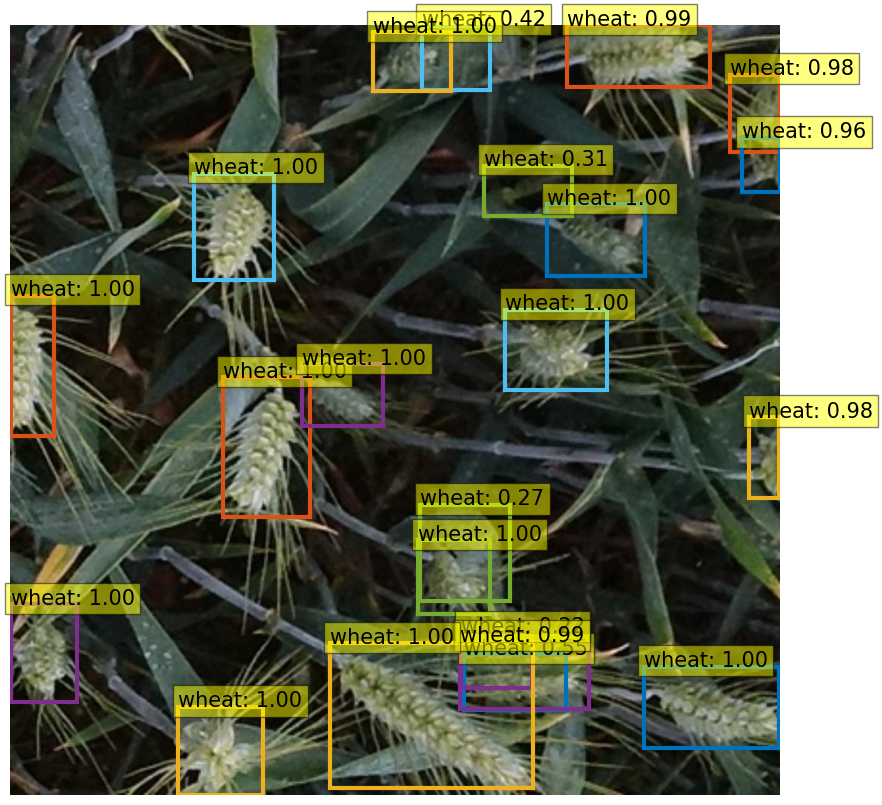

In [33]:
image_id = target['image_id'].item()
image = test_dataset.coco.loadImgs(image_id)[0]
image = Image.open(os.path.join(image_path + '/test', image['file_name']))

visualize_predictions(image, outputs)